<a href="https://colab.research.google.com/github/arjunverma2004/Krish-Naik-Data-Science-course-code/blob/main/S24_FE_chatgpt_ques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('tips.csv')

###Q1 Handling Missing Values
Identify any missing values in the dataset. If there are any, impute them using the following strategies:

Mean for numerical columns.
Mode for categorical columns.

In [3]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [4]:
data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0
price_per_person,0
Payer Name,0
CC Number,0


###Q2 Visualize Missing Data
Create a heatmap using seaborn to visualize any missing values in the dataset.

<Axes: xlabel='total_bill', ylabel='tip'>

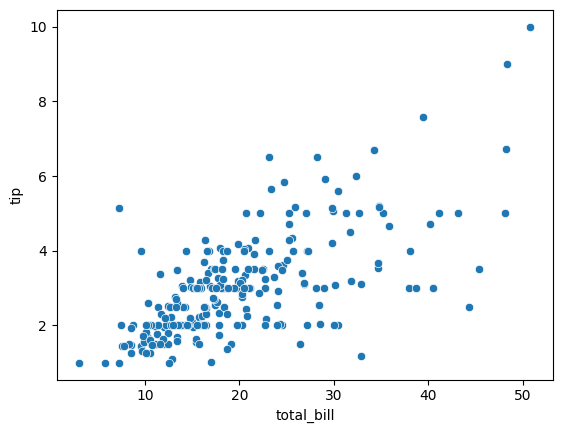

In [10]:
sns.scatterplot(x='total_bill', y='tip', data=data)

<Axes: xlabel='size', ylabel='total_bill'>

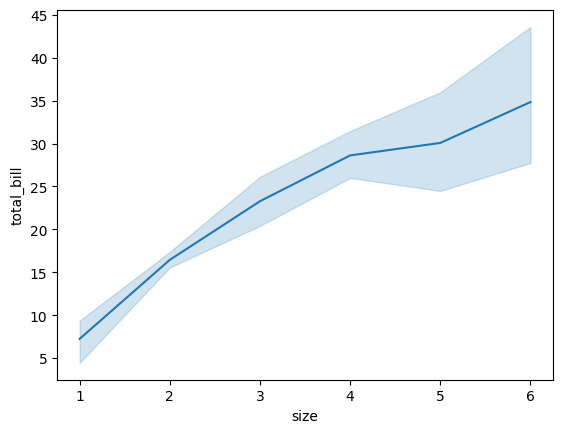

In [11]:
sns.lineplot(x='size', y='total_bill', data=data)

<Axes: xlabel='tip', ylabel='Density'>

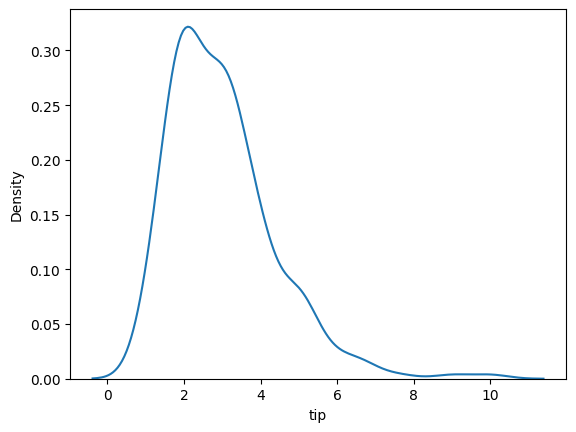

In [12]:
sns.kdeplot(x='tip', data=data)

<Axes: xlabel='sex', ylabel='tip'>

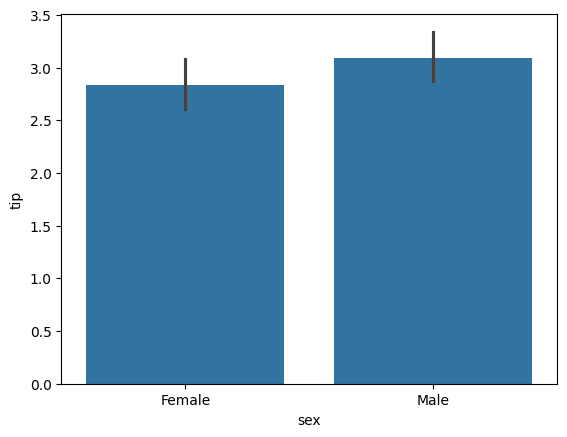

In [14]:
sns.barplot(x='sex', y='tip', data=data)

<Axes: xlabel='day', ylabel='total_bill'>

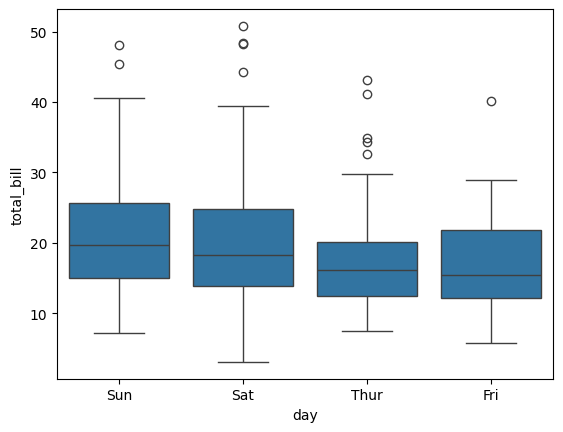

In [16]:
sns.boxplot(x='day', y='total_bill', data=data)

###Handling Outliers

Plot boxplots for the numerical columns (total_bill, tip, etc.) to identify outliers.
Use the IQR method to detect and handle outliers in these columns

In [17]:
import numpy as np
minimum,Q1,median,Q3,maximum = np.quantile(data['total_bill'],[0,0.25,0.50,0.75,1])
print(minimum,Q1,median,Q3,maximum)

3.07 13.3475 17.795 24.127499999999998 50.81


In [18]:
ioq=Q3-Q1
lower_bound=Q1-(1.5*ioq)
upper_bound=Q3+(1.5*ioq)
print(lower_bound,upper_bound)

-2.8224999999999945 40.29749999999999


In [26]:
lst=[]
for i in data['total_bill']:
  if i>upper_bound:
    lst.append(None)
  else:

    lst.append(i)
print(lst)

[16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29, 16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37, 12.69, 21.7, 19.65, 9.55, 18.35, 15.06, 20.69, 17.78, 24.06, 16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94, 9.68, 30.4, 18.29, 22.23, 32.4, 28.55, 18.04, 12.54, 10.29, 34.81, 9.94, 25.56, 19.49, 38.01, 26.41, 11.24, None, 20.29, 13.81, 11.02, 18.29, 17.59, 20.08, 16.45, 3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28, 14.73, 10.51, 17.92, 27.2, 22.76, 17.29, 19.44, 16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49, 5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01, 12.46, 11.35, 15.38, None, 22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.0, 7.25, 38.07, 23.95, 25.71, 17.31, 29.93, 10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8, 8.52, 14.52, 11.38, 22.82, 19.08, 20.27, 11.17, 12.26, 18.26, 8.51, 10.33, 14.15, 16.0, 13.16, 17.47, 34.3, None, 27.05, 16.43, 8.35

In [27]:
data['New_total_bill']=lst

In [28]:
data

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,New_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,24.59
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657,29.03
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766,27.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880,22.67
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17,17.82


In [33]:
data['New_total_bill'].isnull().sum()

0

In [30]:
data['New_total_bill'].fillna(data['New_total_bill'].mean(),inplace=True)

<ipython-input-30-092801c8650c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['New_total_bill'].fillna(data['New_total_bill'].mean(),inplace=True)


<Axes: xlabel='day', ylabel='New_total_bill'>

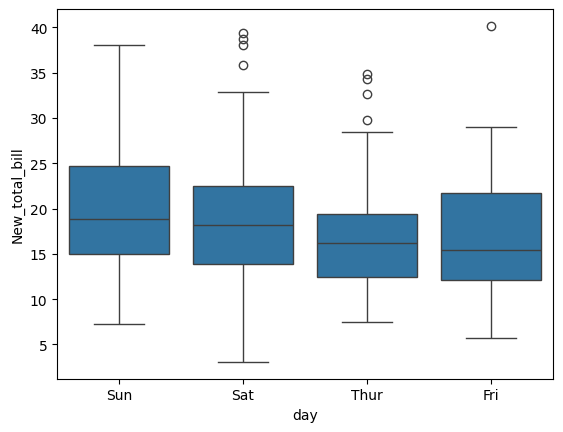

In [32]:
sns.boxplot(x='day', y='New_total_bill', data=data)

<Axes: xlabel='day', ylabel='Log_total_bill'>

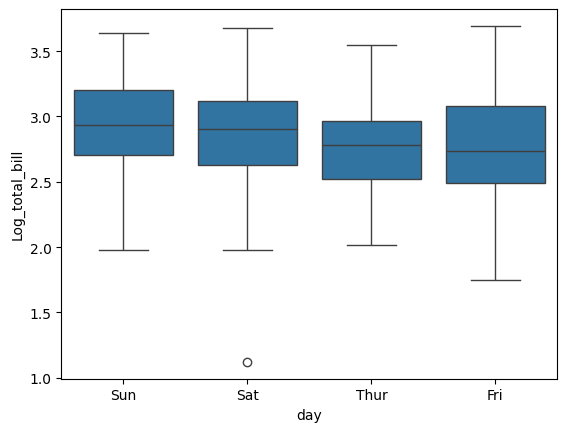

In [35]:
import numpy as np
data['Log_total_bill'] = np.log(data['New_total_bill'])
sns.boxplot(x='day', y='Log_total_bill', data=data)

###Handling Imbalanced Datasets
Assume you are predicting the sex column (Male/Female). Check if the dataset is imbalanced. If yes, balance it using SMOTE

In [36]:
data['sex'].value_counts()

,count
sex,
Male,157
Female,87


,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,New_total_bill,Log_total_bill
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,10.34,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,21.01,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,23.68,3.164631
5,25.29,4.71,Male,No,Sun,Dinner,4,6.32,Erik Smith,213140353657882,Sun9679,25.29,3.230409
6,8.77,2.00,Male,No,Sun,Dinner,2,4.38,Kristopher Johnson,2223727524230344,Sun5985,8.77,2.171337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032,12.60,2.533697
237,32.83,1.17,Male,Yes,Sat,Dinner,2,16.42,Thomas Brown,4284722681265508,Sat2929,32.83,3.491343
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657,29.03,3.368330
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880,22.67,3.121042


In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sex']=le.fit_transform(data['sex'])

In [64]:
df1 = data['sex']
df1

,sex
0,0
1,1
2,1
3,1
4,0
...,...
239,1
240,0
241,1
242,1


In [66]:
dfm=df1[df1==0]
dff=df1[df1==1]


In [70]:
#Upscaling
from sklearn.utils import resample
dff_upsampled = resample(dff,
                          replace=True, # sample with replacement
                          n_samples=len(dfm), # match number in majority class
                          random_state=42) # reproducible results

In [71]:
dff_upsampled.value_counts()

,count
sex,
1,87


In [60]:
dff_upsampled = resample(dff,
                          replace=True, # sample with replacement
                          n_samples=len(dfm), # match number in majority class
                          random_state=27) # reproducible results

In [61]:
dff_upsampled['sex'].value_counts()

,count
sex,
1,87


In [62]:
# Combine the upsampled minority and majority datasets
balanced_data = pd.concat([dfm_upsampled, dff_upsampled])

# Check the class distribution of the balanced dataset
print(balanced_data['sex'].value_counts())

sex
0    157
1     87
Name: count, dtype: int64


###Nominal Encoding (OHE)
Perform one-hot encoding on the day column and add the encoded columns to the dataset.

In [73]:
from pickle import encode_long
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
encoded_data=ohe.fit_transform(data[['day']])
encoded_df=pd.DataFrame(encoded_data.toarray(),columns=ohe.get_feature_names_out())
print(encoded_df)

     day_Fri  day_Sat  day_Sun  day_Thur
0        0.0      0.0      1.0       0.0
1        0.0      0.0      1.0       0.0
2        0.0      0.0      1.0       0.0
3        0.0      0.0      1.0       0.0
4        0.0      0.0      1.0       0.0
..       ...      ...      ...       ...
239      0.0      1.0      0.0       0.0
240      0.0      1.0      0.0       0.0
241      0.0      1.0      0.0       0.0
242      0.0      1.0      0.0       0.0
243      0.0      0.0      0.0       1.0

[244 rows x 4 columns]


###Label Encoding
Apply label encoding on the smoker column.



In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['smoker']=le.fit_transform(data['smoker'])

In [75]:
data['smoker']

,smoker
0,0
1,0
2,0
3,0
4,0
...,...
239,0
240,1
241,1
242,0


###Ordinal Encoding
Assume the time column (Lunch/Dinner) has an order (e.g., Lunch < Dinner). Encode it using ordinal encoding.

In [76]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Lunch','Dinner']])
data['time']=oe.fit_transform(data[['time']])

In [77]:
data['time']

,time
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
239,1.0
240,1.0
241,1.0
242,1.0


<Axes: xlabel='time', ylabel='total_bill'>

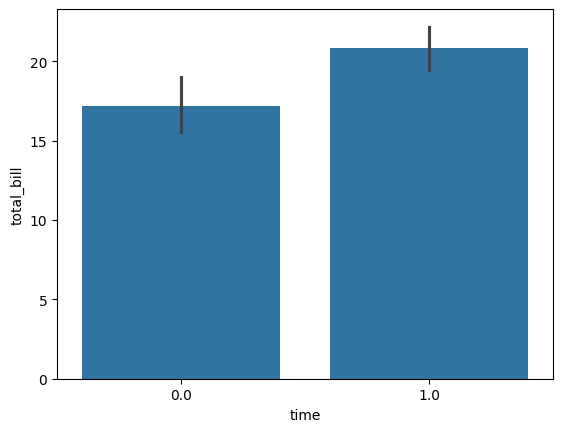

In [78]:
sns.barplot(x='time',y='total_bill',data=data)